# **Project: Diabetes Detection System**

**Submitted by : Debbrath Debnath**

**Class : AI Engineering (Batch - 1)**


## **Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

# Library - Data Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from collections import Counter

# Library - Classification Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Library - Build Model
import joblib

## **Step 2: Load Dataset**

In [ ]:
# df = pd.read_csv("diabetes.csv")
# df = pd.read_csv("https://raw.githubusercontent.com/aronno1920/AI-Engineering/main/Assignment/diabete-dataset.csv")
df = pd.read_csv("https://raw.githubusercontent.com/sujonnath/AI-Engineering/b8b4d3db5463c8906ce7fae80d42851a6d1ed6fc/Assignment/diabetes.csv")
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


## **Step 3: Data Cleaning**

In [ ]:
print("\n")
df.info()
print("\n\nShow Top 5:\n", df.head())
print("\nData Describe:\n", df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Show Top 5:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2      

In [ ]:
print("\nShow Null Values Count in Each Column:\n\n", df.isnull().sum())
#cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
#df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
#df.isnull().sum()


Show Null Values Count in Each Column:

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## **Step 4: Exploratory Data Analysis (EDA)**

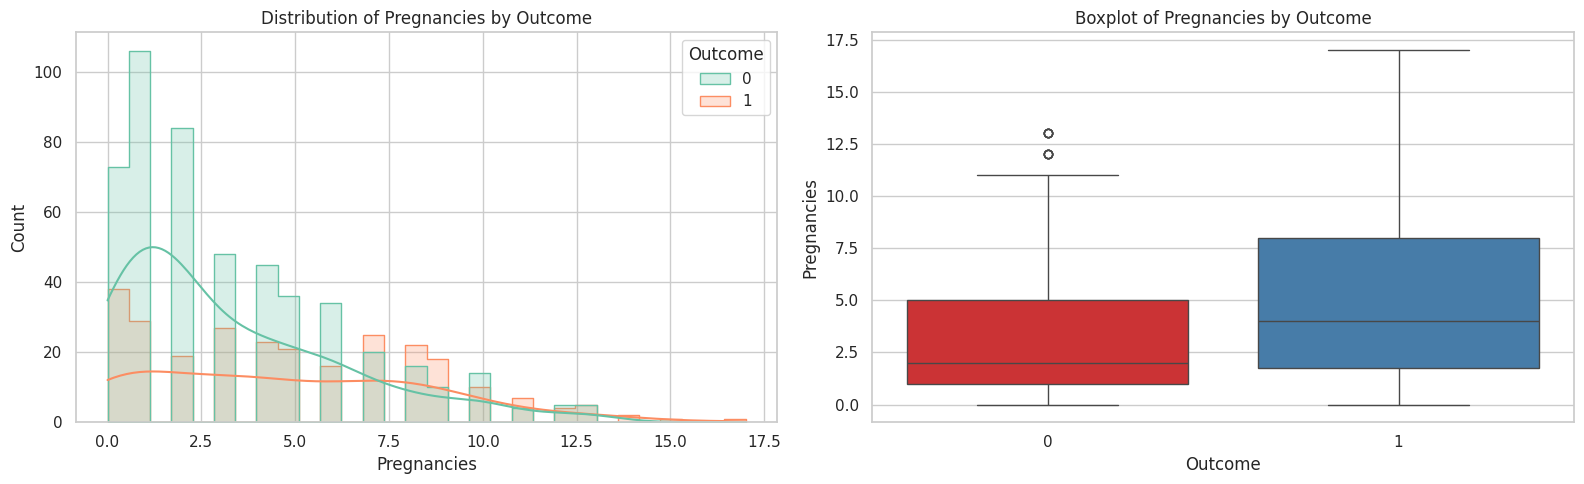

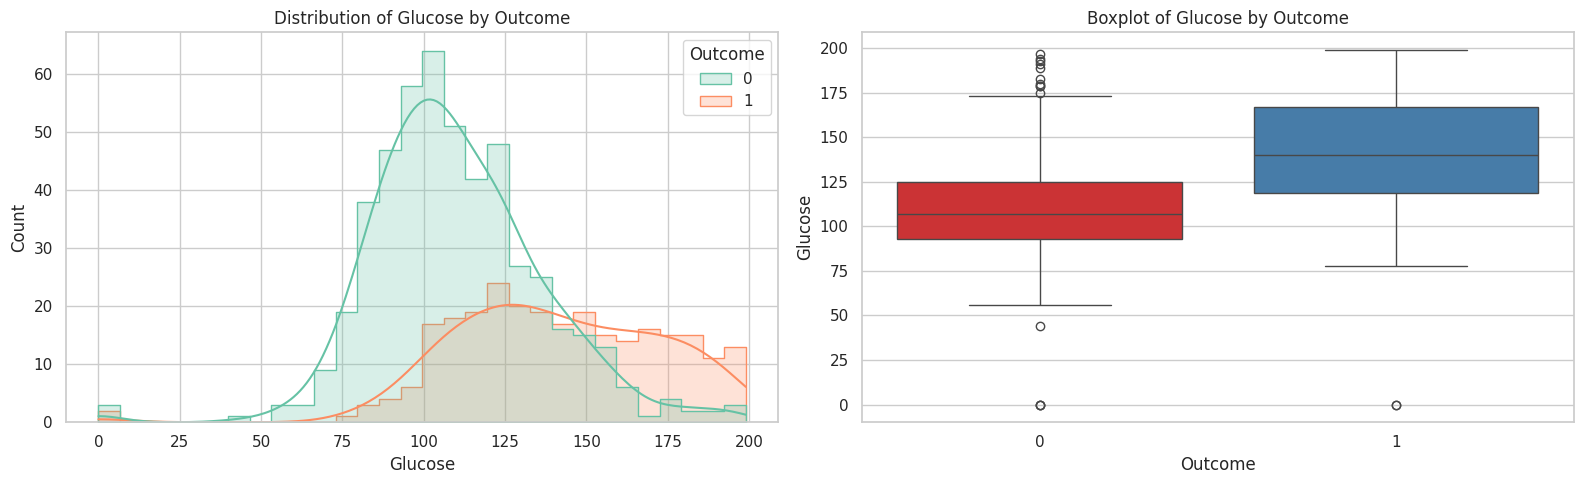

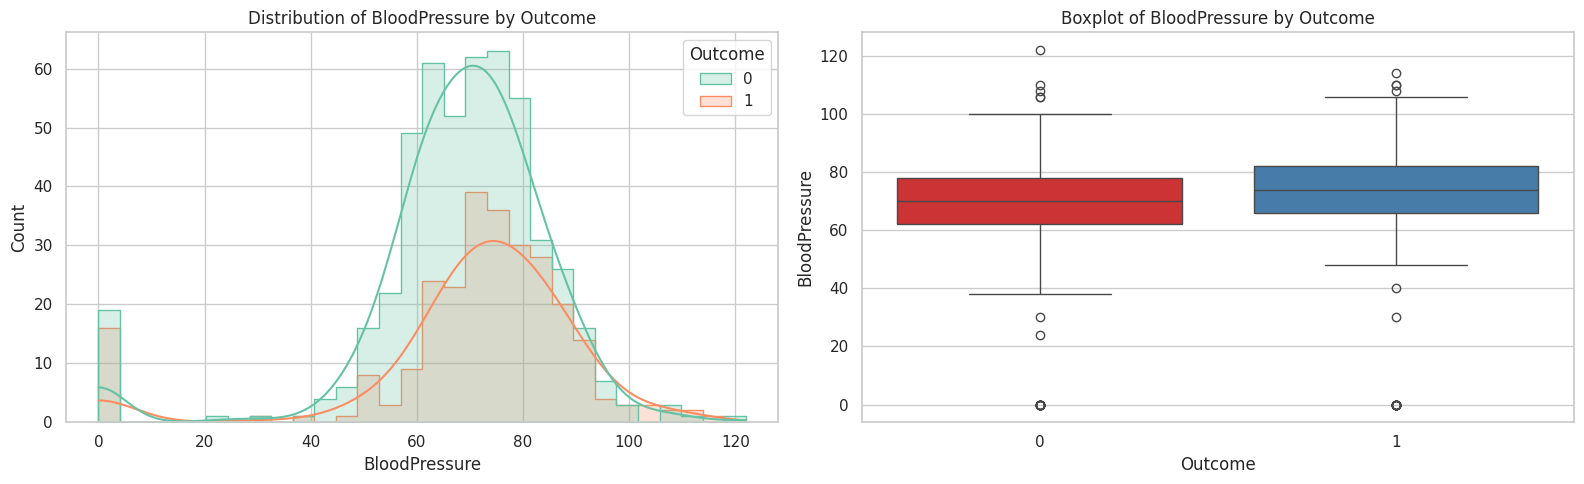

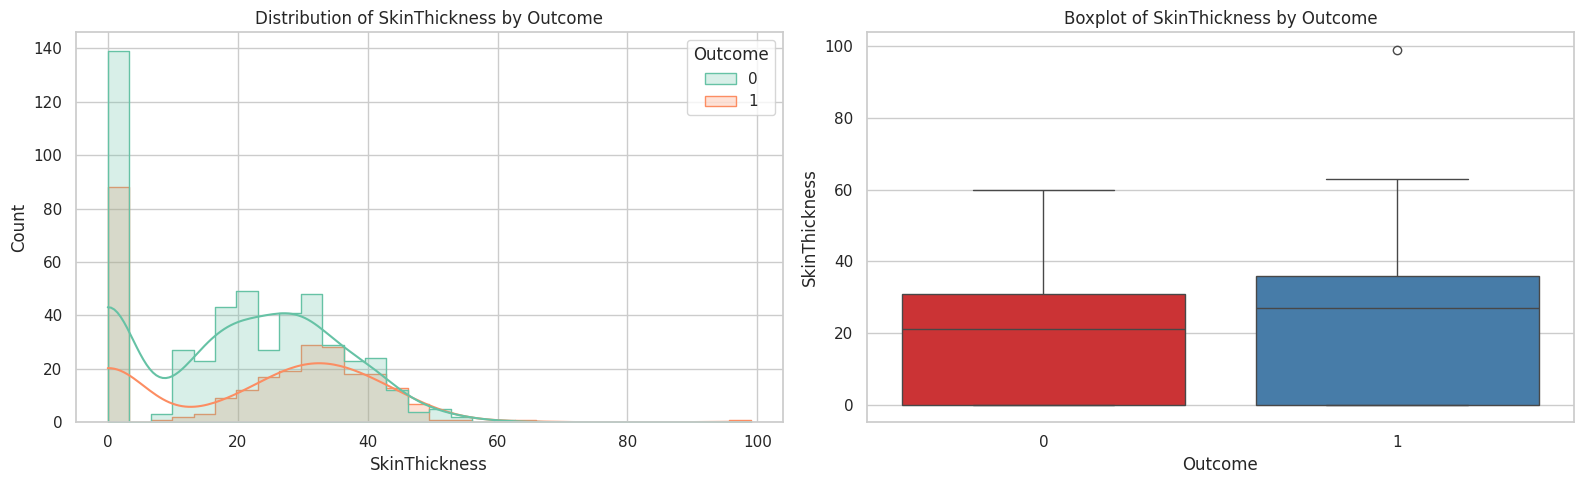

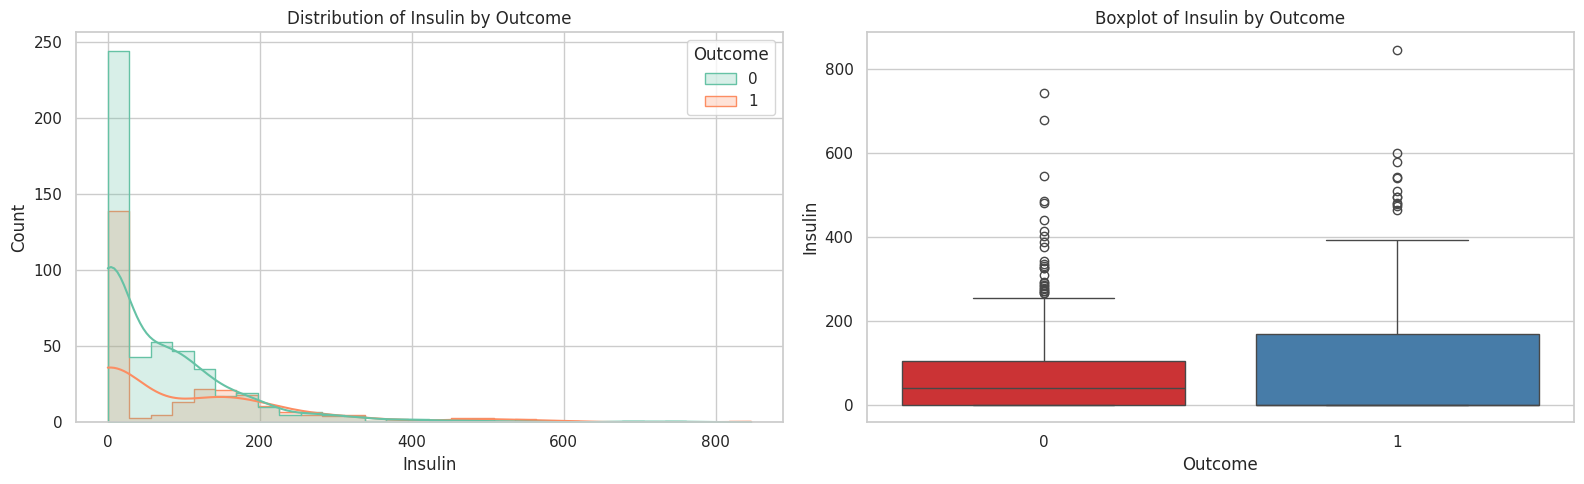

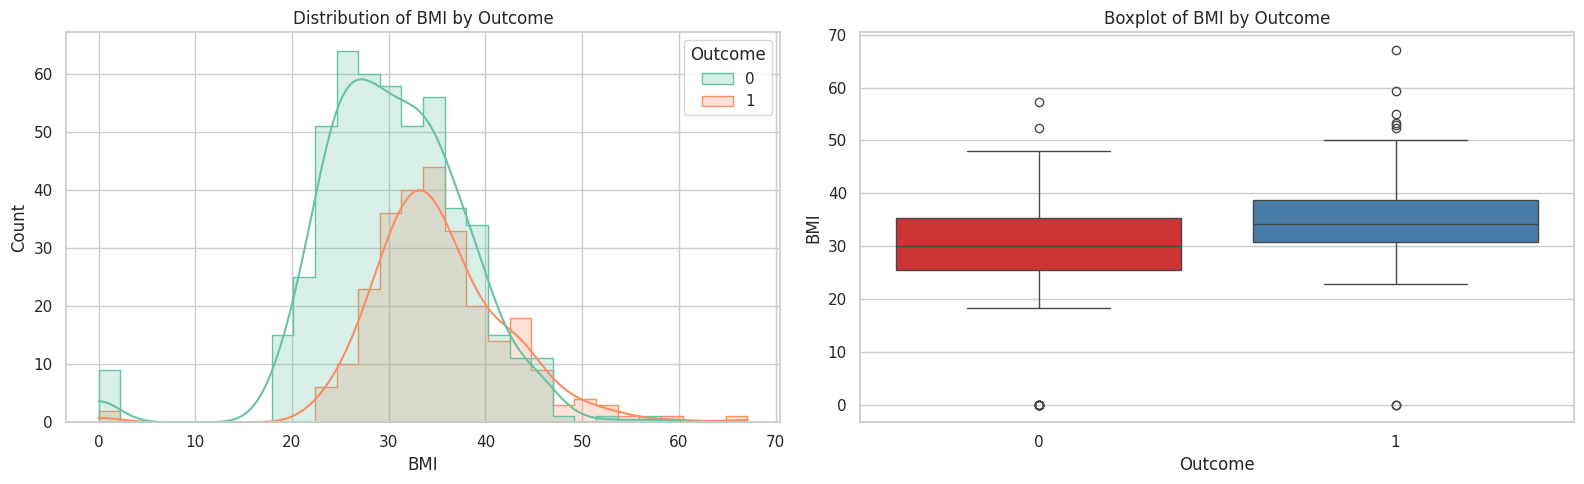

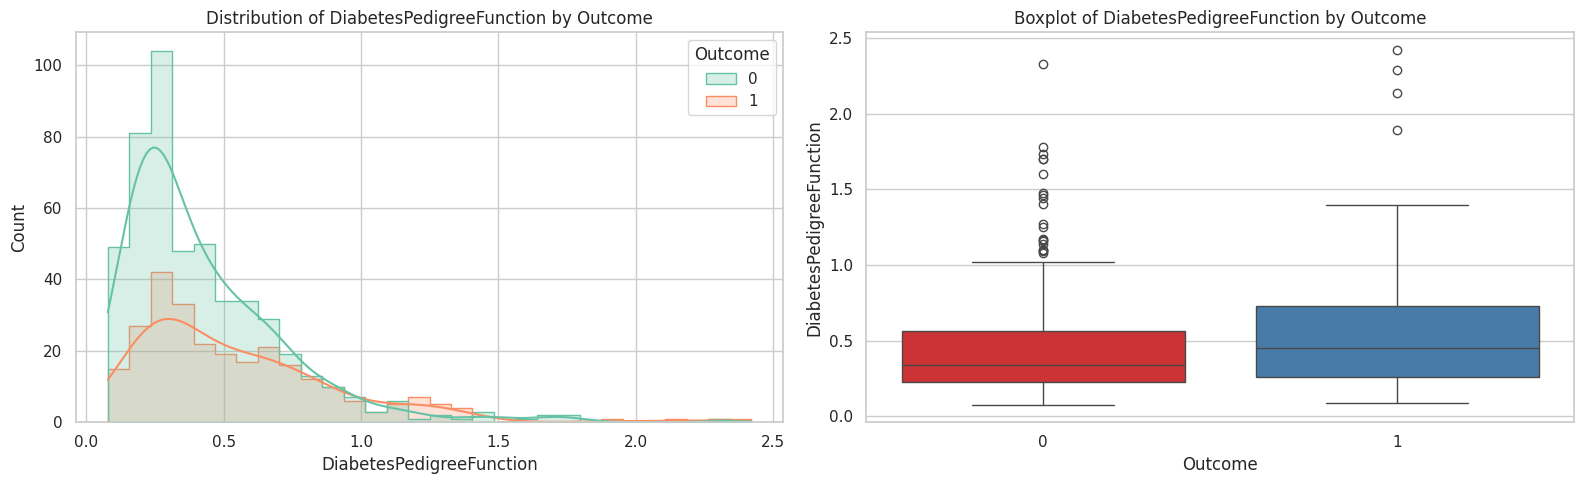

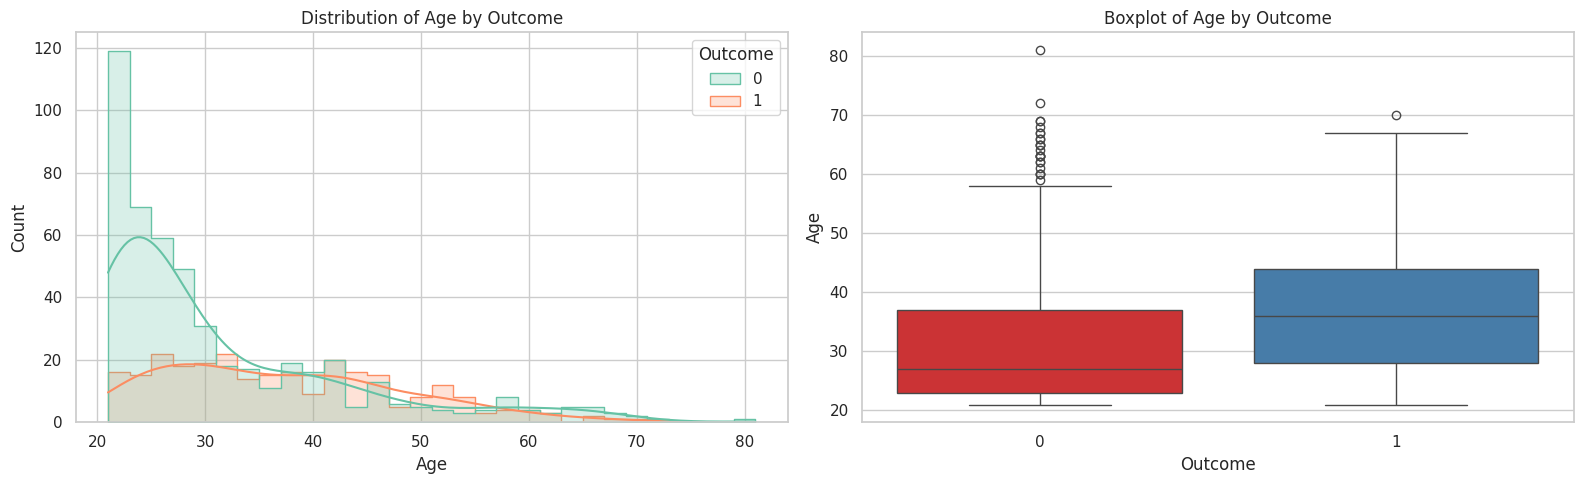

In [ ]:
sns.set(style="whitegrid")
features = [col for col in df.columns if col != 'Outcome']

for feature in features:
    plt.figure(figsize=(16, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, x=feature, hue="Outcome", kde=True, bins=30, palette="Set2", element="step")
    plt.title(f"Distribution of {feature} by Outcome")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Outcome", y=feature, data=df, hue="Outcome", palette="Set1")
    plt.title(f"Boxplot of {feature} by Outcome")
    plt.legend([], [], frameon=False)  # Hide legend

    plt.tight_layout()
    plt.show()

**Heatmap Correlation**

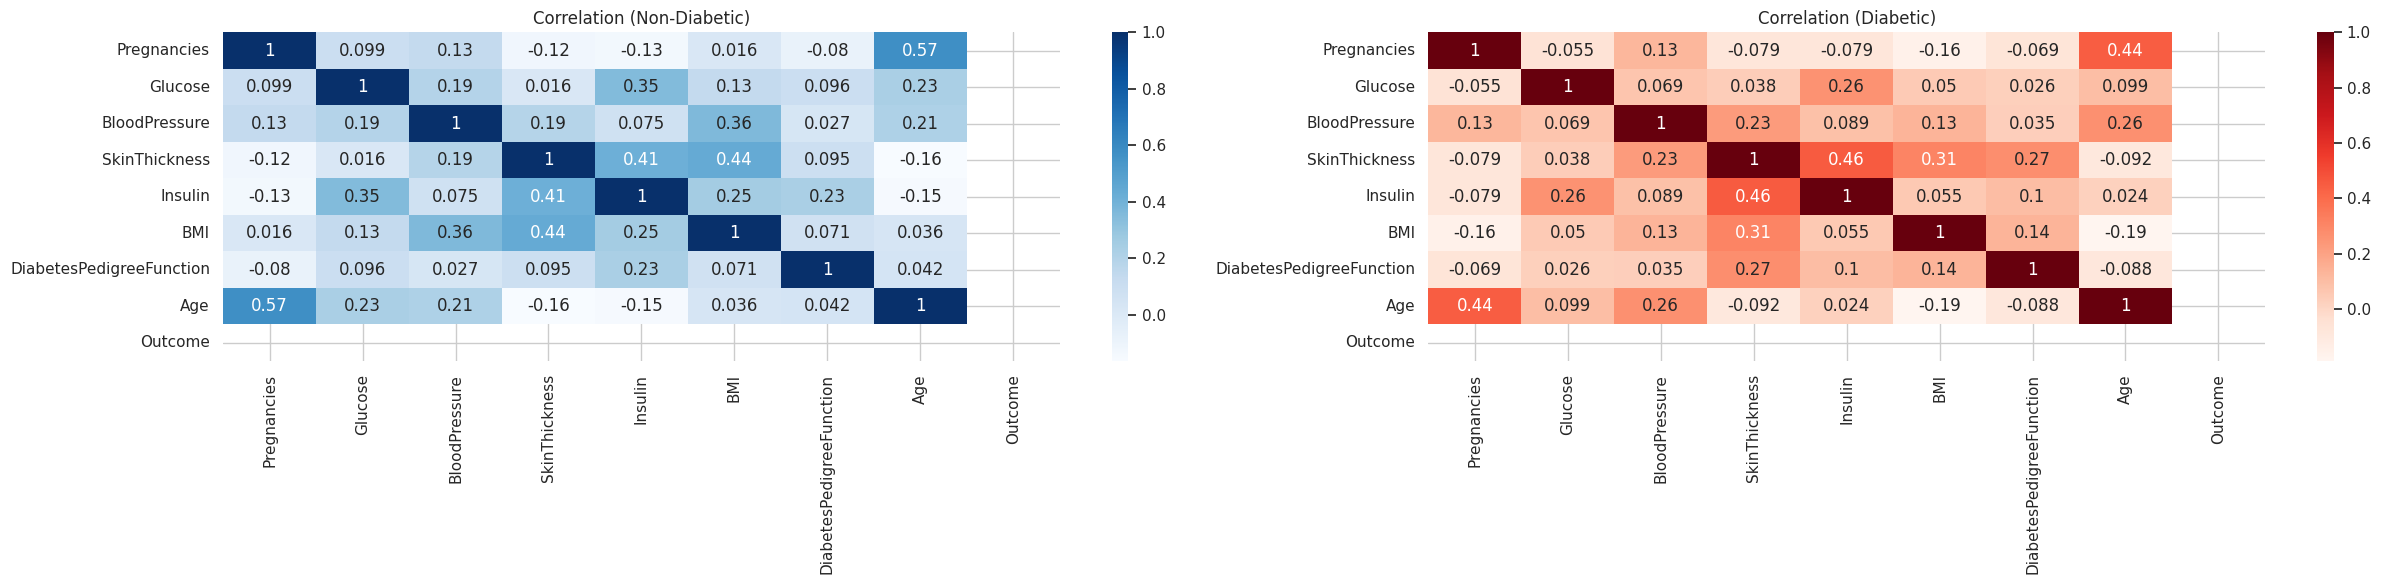

In [ ]:
# Heatmap Correlation

# Correlation matrix for diabetics only
diabetic_corr = df[df["Outcome"] == 1].corr()
non_diabetic_corr = df[df["Outcome"] == 0].corr()

# Plot
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(non_diabetic_corr, annot=True, cmap='Blues')
plt.title("Correlation (Non-Diabetic)")

plt.subplot(1, 2, 2)
sns.heatmap(diabetic_corr, annot=True, cmap='Reds')
plt.title("Correlation (Diabetic)")

plt.tight_layout()
plt.show()

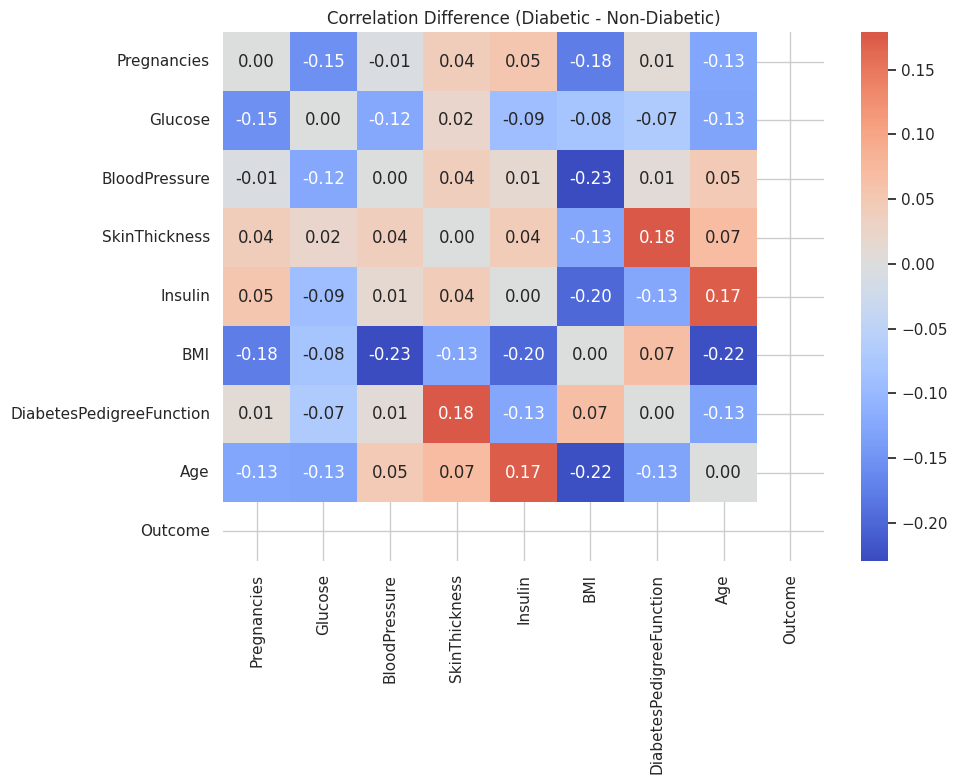

In [ ]:
# Separate correlation matrices
diabetic_corr = df[df["Outcome"] == 1].corr()
non_diabetic_corr = df[df["Outcome"] == 0].corr()

# Difference in correlations
corr_diff = diabetic_corr - non_diabetic_corr

# Plot single heatmap of the differences
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Difference (Diabetic - Non-Diabetic)")
plt.tight_layout()
plt.show()

## **Step 5: Train-Test Split**

In [ ]:
# df.fillna(df.mean(), inplace=True)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, "scaler.pkl")

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
# Check the class distribution after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

print("\nScaled Training Data:",X_train_scaled.shape)
display(X_train_scaled.head())

print("\nScaled Test Data:",X_test_scaled.shape)
display(X_test_scaled.head())

print("\nTraining Data Shape:")
print(X_train_scaled.shape)
print(X_test_scaled.shape)

Before SMOTE: Counter({0: 400, 1: 214})
After SMOTE: Counter({0: 400, 1: 400})

Scaled Training Data: (614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,-0.851355,-0.980131,-0.404784,-0.553973,-0.331319,-0.607678,0.310794,-0.792169
711,0.356576,0.161444,0.465368,0.392787,-0.526398,-0.302139,-0.116439,0.561034
373,-0.549372,-0.504474,-0.622322,1.213312,0.142444,0.372594,-0.764862,-0.707594
46,-0.851355,0.795653,-0.731091,-1.311380,-0.730766,-0.289408,0.262314,-0.369293
682,-1.153338,-0.821579,-0.296015,1.150195,0.244628,1.607482,-0.337630,-0.961320



Scaled Test Data: (154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,0.960541,1.207888,-0.296015,-1.311380,-0.730766,-0.582217,-0.555791,0.561034
672,1.866489,-1.677760,1.988135,0.140318,-0.275582,0.448979,-0.583061,1.153060
700,-0.549372,0.034603,0.356599,0.392787,1.127127,0.499902,0.016882,-0.623019
630,0.960541,-0.219081,-0.296015,-1.311380,-0.730766,-0.582217,0.771356,0.053583
81,-0.549372,-1.487497,-3.776623,-1.311380,-0.730766,-4.070459,-1.137554,-0.961320



Training Data Shape:
(614, 8)
(154, 8)


## **6. Model Evaluate**

**Model data fit and print accuracy_score & classification_report**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
#SVM
svm = SVC(probability=True, kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
#MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
#Ada
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
#GNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Multi-Layer Perceptron":MLPClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}

trained_models = {}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-Score": round(report["weighted avg"]["f1-score"], 4),
        "Accuracy": round(acc, 4)
    })

results_df = pd.DataFrame(results)
print("\n", results_df)


                     Model  Precision  Recall  F1-Score  Accuracy
0     Logistic Regression     0.7065  0.7143    0.7084    0.7143
1     K-Nearest Neighbors     0.6946  0.7013    0.6969    0.7013
2           Decision Tree     0.7108  0.7208    0.7102    0.7208
3           Random Forest     0.7546  0.7597    0.7555    0.7597
4                 XGBoost     0.7423  0.7468    0.7437    0.7468
5  Support Vector Machine     0.7497  0.7532    0.7509    0.7532
6  Multi-Layer Perceptron     0.7143  0.7143    0.7143    0.7143
7                AdaBoost     0.7894  0.7922    0.7902    0.7922
8    Gaussian Naive Bayes     0.7179  0.7078    0.7114    0.7078


### **Confusion Matrix**

In [ ]:
def plot_conf_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Confusion Matrix (Logistic Regression)):
 [[82 18]
 [26 28]]


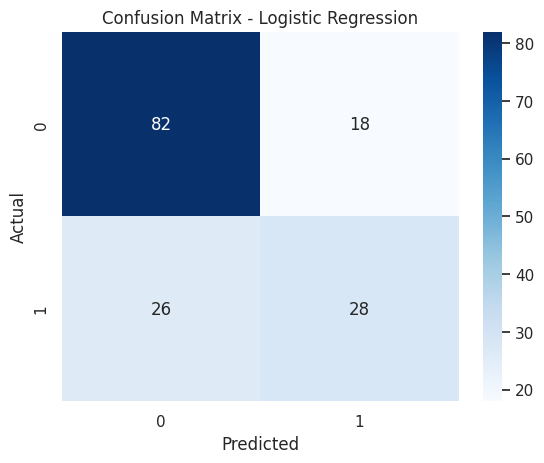



Confusion Matrix (K-Nearest Neighbors)):
 [[80 20]
 [26 28]]


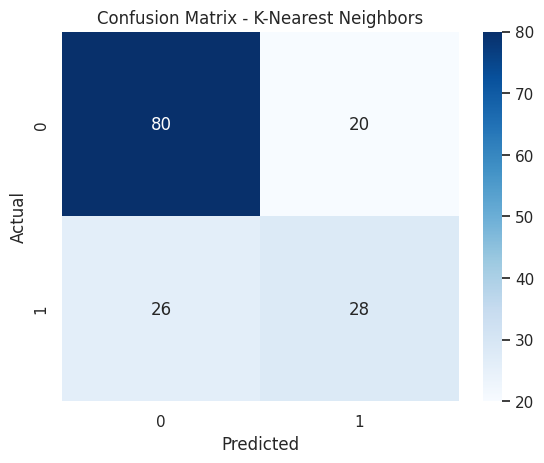



Confusion Matrix (Decision Tree)):
 [[85 15]
 [28 26]]


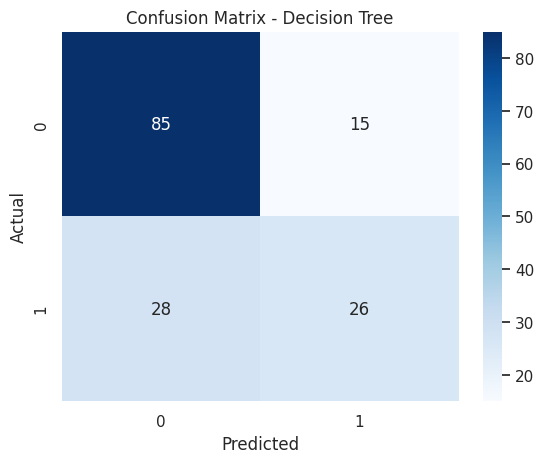



Confusion Matrix (Random Forest)):
 [[85 15]
 [22 32]]


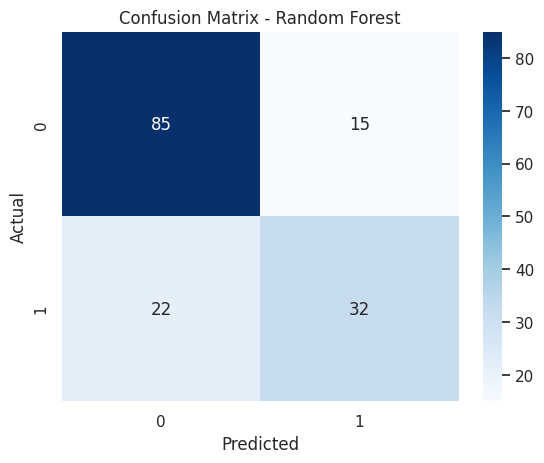



Confusion Matrix (XGBoost)):
 [[83 17]
 [22 32]]


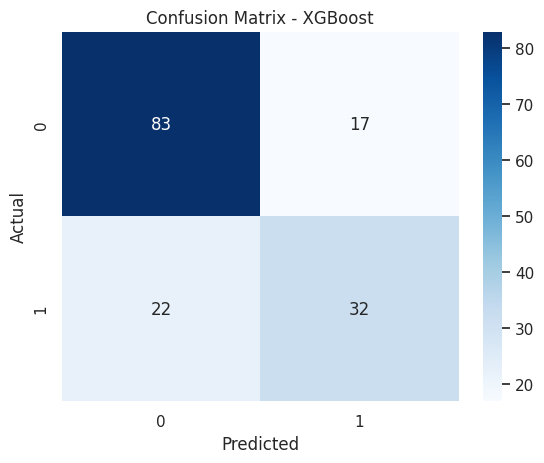



Confusion Matrix (Support Vector Machine)):
 [[83 17]
 [21 33]]


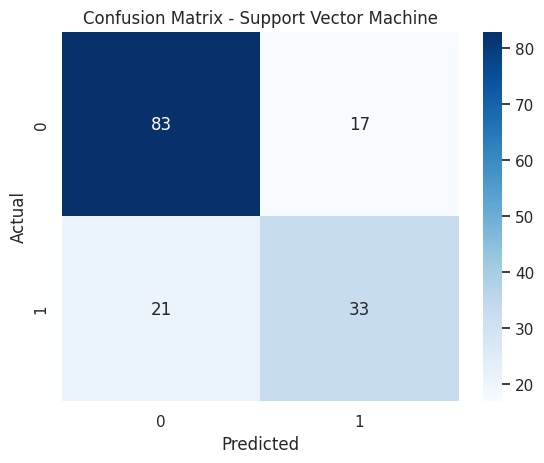



Confusion Matrix (Multi-Layer Perceptron)):
 [[82 18]
 [22 32]]


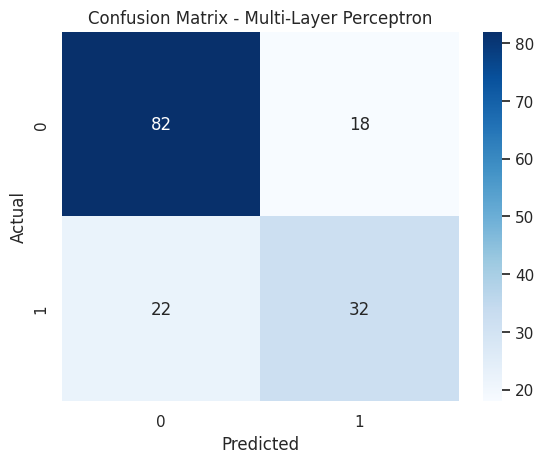



Confusion Matrix (AdaBoost)):
 [[86 14]
 [18 36]]


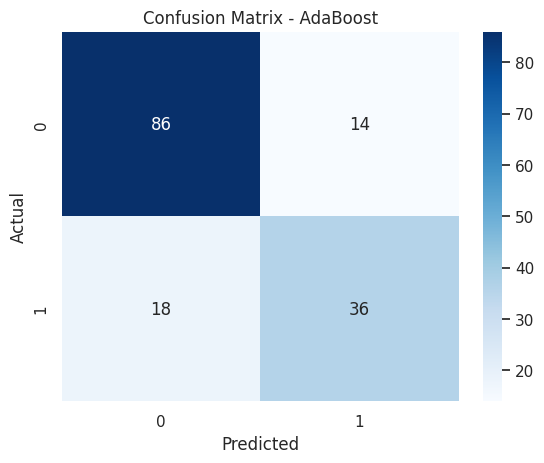



Confusion Matrix (Gaussian Naive Bayes)):
 [[74 26]
 [19 35]]


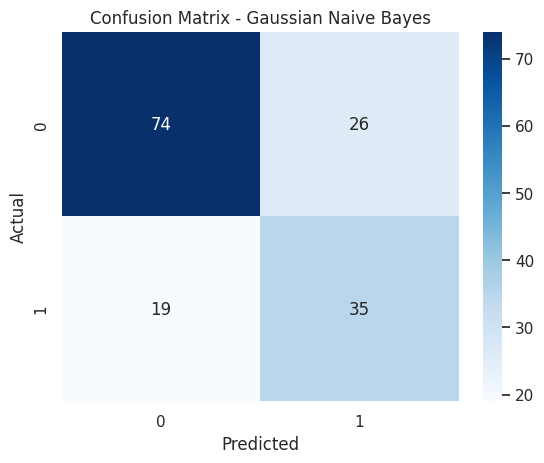

In [ ]:
for name, model in models.items():
  y_pred_log = model.predict(X_test_scaled.values if hasattr(X_test_scaled, "values") else X_test_scaled)
  cm_log = confusion_matrix(y_test, y_pred_log)

  print(f"\n\nConfusion Matrix ({name})):\n", cm_log)
  plot_conf_matrix(y_test, y_pred_log, name)

### **ROC & AUC**


--- Logistic Regression ---
Confusion Matrix:
[[82 18]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


--- K-Nearest Neighbors ---
Confusion Matrix:
[[80 20]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


--- Decision Tree ---
Confusion Matrix:
[[85 15]
 [28 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75    

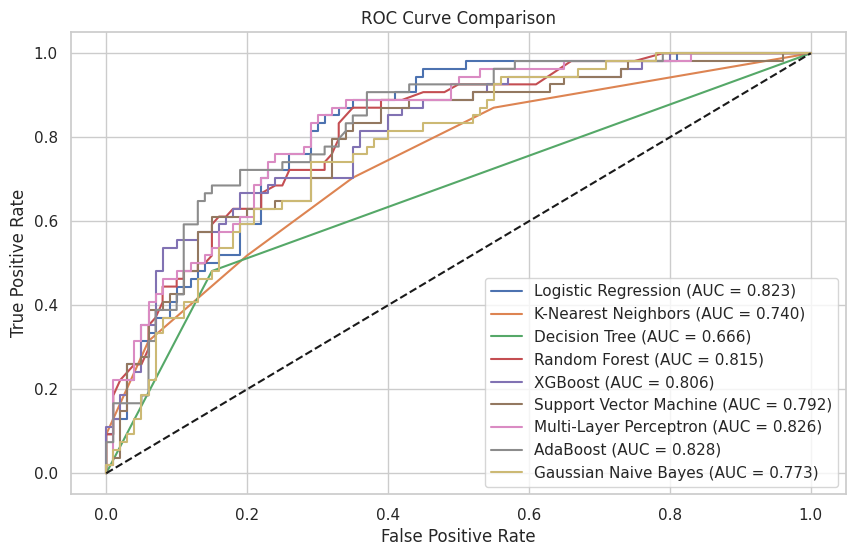

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

plt.figure(figsize=(10, 6))

for name, model in trained_models.items():
    fpr, tpr, roc_auc = evaluate_model(name, model, X_test, y_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()






## **Step 7: Predict for a New Person**

In [ ]:
# Sample input data (change values as needed)
input_data = [2, 148, 72, 35, 0, 33.6, 0.627, 50]

# Feature columns
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create DataFrame for input
new_data_df = pd.DataFrame([input_data], columns=columns)

# Scale data for models that require it
scaled_data = scaler.transform(new_data_df)

#Example Logistic Regression
prediction = lr.predict(scaled_data)
proba = lr.predict_proba(scaled_data)[0][1]
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")
print("Probability of being diabetic:", round(proba * 100, 2), "%")
#Compare Predictions from Other Models
for model, name in [(lr, "Logistic Regression"),
                    (knn, "KNN"),
                    (dt, "Decision Tree"),
                    (rf, "Random Forest"),
                    (xgb, "XGBoost"),
                    (svm, "Support Vector Machine"),
                    (mlp, "Multi-Layer Perceptron"),
                    (ada, "AdaBoost"),
                    (gnb, "Gaussian Naive Bayes")]:  # if RF used
    pred = model.predict(scaled_data)[0]
    proba = model.predict_proba(scaled_data)[0][1]
    print(f"{name}: {'Diabetic' if pred == 1 else 'Not Diabetic'} ({round(proba * 100, 2)}%)")

Prediction: Diabetic
Probability of being diabetic: 63.44 %
Logistic Regression: Diabetic (63.44%)
KNN: Diabetic (60.0%)
Decision Tree: Diabetic (100.0%)
Random Forest: Diabetic (71.0%)
XGBoost: Diabetic (94.69000244140625%)
Support Vector Machine: Diabetic (66.38%)
Multi-Layer Perceptron: Diabetic (54.35%)
AdaBoost: Diabetic (51.82%)
Gaussian Naive Bayes: Diabetic (55.07%)


## **Step 8: Final Output**

In [ ]:
for name, model in models.items():
  print("Model: ", name)

Model:  Logistic Regression
Model:  K-Nearest Neighbors
Model:  Decision Tree
Model:  Random Forest
Model:  XGBoost
Model:  Support Vector Machine
Model:  Multi-Layer Perceptron
Model:  AdaBoost
Model:  Gaussian Naive Bayes


In [ ]:
joblib.dump(models["AdaBoost"], 'diabetes_model.pkl')

['diabetes_model.pkl']

## **Step 9: Test Model with Unknown Data**

In [ ]:
# Load scaler and model
scaler = joblib.load("scaler.pkl")
joblib.dump(models["Random Forest"], 'diabetes_model.pkl')
model = joblib.load("diabetes_model.pkl")

# Define feature names
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# New data as DataFrame
new_data = pd.DataFrame([[5,149,71,35,0,33.6,0.711,55]], columns=features)

# Scale and convert back to DataFrame with same columns
new_data_scaled = scaler.transform(new_data)
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=features)

# Predict
prediction = model.predict(new_data_scaled_df)
proba = model.predict_proba(new_data_scaled_df)[0][1]

# Output
print("Prediction:", "Diabetes" if prediction[0] == 1 else "No Diabetes")
print(f"Probability of Diabetes: {proba:.2%}")

Prediction: Diabetes
Probability of Diabetes: 67.00%
